### In this experiment we will take only single words and try to see how in different words their translation are and when embedded how similar are they .....

In [6]:
import numpy as np
import os

In [7]:
words = ["cat","tiger","dog","human","lizard"]
languages=languages = ["odia","hindi","spanish","french","telgu"]
word_dictionary = {
    "cat": {
        "odia": "ବିଲେଇ",
        "hindi": "बिल्ली",
        "spanish": "gato",
        "french": "chat",
        "telgu": "పిల్లి",
        "english": "cat"
    },
    "tiger": {
        "odia": "ବାଘ",
        "hindi": "बाघ",
        "spanish": "tigre",
        "french": "tigre",
        "telgu": "పులి",
        "english": "tiger"
    },
    "dog": {
        "odia": "କୁକୁର",
        "hindi": "कुत्ता",
        "spanish": "perro",
        "french": "chien",
        "telgu": "కుక్క",
        "english": "dog"
    },
    "human": {
        "odia": "ମାନବ",
        "hindi": "मानव",
        "spanish": "humano",
        "french": "humain",
        "telgu": "మనిషి",
        "english": "human"
    },
    "lizard": {
        "odia": "ଝିଟିପିଟି",
        "hindi": "छिपकली",
        "spanish": "lagartija",
        "french": "lézard",
        "telgu": "తెక్కెతల్లి",
        "english": "lizard"
    }
}

In [8]:
from sentence_transformers import SentenceTransformer

model_cache = {}

def get_embedding(text: str, model_name: str):
    if model_name not in model_cache:
        model_cache[model_name] = SentenceTransformer(model_name)
    model = model_cache[model_name]
    embedding = model.encode(text)
    return embedding

/home/sourav/embedding-crosslinguality-study/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [9]:
embeddings = {}

for word, translations in word_dictionary.items():
    embeddings[word] = {}
    for lang, text in translations.items():
        embedding = get_embedding(text, "paraphrase-multilingual-MiniLM-L12-v2")
        embeddings[word][lang] = embedding

In [10]:
def print_truncated_embeddings(embeddings_dict, truncate_to=5):
    for word, langs in embeddings_dict.items():
        print(f"\nWord: {word}")
        for lang, emb in langs.items():
            truncated = emb[:truncate_to] 
            print(f"  {lang}: {truncated} ...")

print_truncated_embeddings(embeddings)


Word: cat
  odia: [ 0.05073225  0.13468434 -0.07817374  0.06069111 -0.14697888] ...
  hindi: [ 0.50793386 -0.30867803 -0.00244643  0.49554476 -0.36204544] ...
  spanish: [ 0.47697437 -0.29324326  0.00572434  0.45287827 -0.31715736] ...
  french: [ 0.09950843 -0.14240311 -0.05719693 -0.07046666 -0.5202014 ] ...
  telgu: [0.01664199 0.05214642 0.0383993  0.0856315  0.04127157] ...
  english: [ 0.59055376 -0.3334292  -0.0325752   0.5430223  -0.3723456 ] ...

Word: tiger
  odia: [ 0.12749933  0.1210386  -0.03436894  0.13711609 -0.12345012] ...
  hindi: [ 0.3233989   0.2552848  -0.08809485  0.52502143 -0.2956437 ] ...
  spanish: [ 0.07023247  0.24057324 -0.17565791  0.60982877 -0.21322894] ...
  french: [ 0.07023247  0.24057324 -0.17565791  0.60982877 -0.21322894] ...
  telgu: [ 0.02545889  0.08713041  0.02380252  0.0499649  -0.07064149] ...
  english: [ 0.18443716  0.2770542  -0.12556964  0.6654376  -0.37851965] ...

Word: dog
  odia: [ 0.00333608 -0.03001649  0.0492457   0.05966895 -0.14

In [11]:
def cosine_similarity(v1, v2):
    v1 = np.array(v1)
    v2 = np.array(v2)
    return np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))

In [12]:
from itertools import combinations

similarities = {}

for word, lang_embeds in embeddings.items():
    similarities[word] = {}
    langs = list(lang_embeds.keys())
    
    for lang1, lang2 in combinations(langs, 2):
        vec1 = lang_embeds[lang1]
        vec2 = lang_embeds[lang2]
        sim = cosine_similarity(vec1, vec2)
        key = f"{lang1}-{lang2}"
        similarities[word][key] = sim

In [13]:
print(similarities)

{'cat': {'odia-hindi': np.float32(0.2819575), 'odia-spanish': np.float32(0.35383636), 'odia-french': np.float32(0.43351522), 'odia-telgu': np.float32(0.81010634), 'odia-english': np.float32(0.27976862), 'hindi-spanish': np.float32(0.99075174), 'hindi-french': np.float32(0.21202606), 'hindi-telgu': np.float32(0.3991709), 'hindi-english': np.float32(0.99439704), 'spanish-french': np.float32(0.2667701), 'spanish-telgu': np.float32(0.47968897), 'spanish-english': np.float32(0.9908945), 'french-telgu': np.float32(0.46925116), 'french-english': np.float32(0.23453626), 'telgu-english': np.float32(0.40225774)}, 'tiger': {'odia-hindi': np.float32(0.53421503), 'odia-spanish': np.float32(0.54678756), 'odia-french': np.float32(0.54678756), 'odia-telgu': np.float32(0.91203296), 'odia-english': np.float32(0.5744864), 'hindi-spanish': np.float32(0.9661837), 'hindi-french': np.float32(0.9661837), 'hindi-telgu': np.float32(0.52051824), 'hindi-english': np.float32(0.97351557), 'spanish-french': np.float

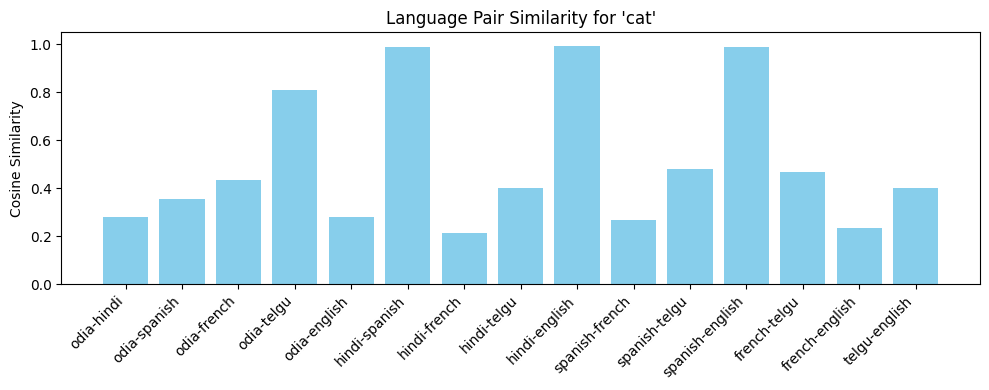

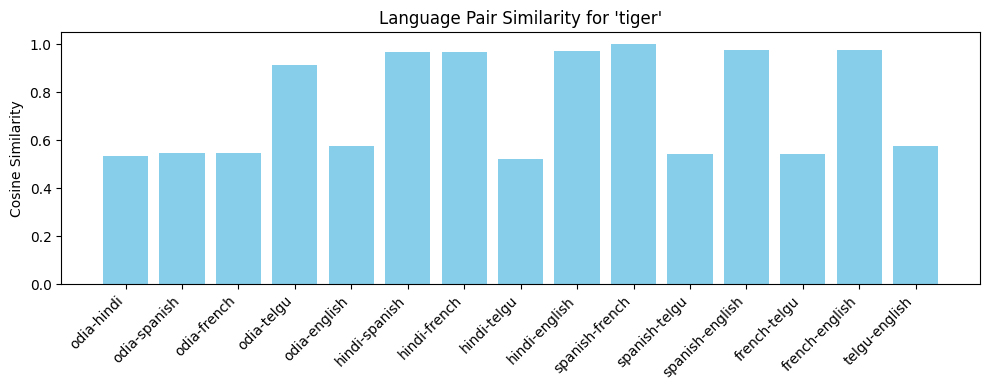

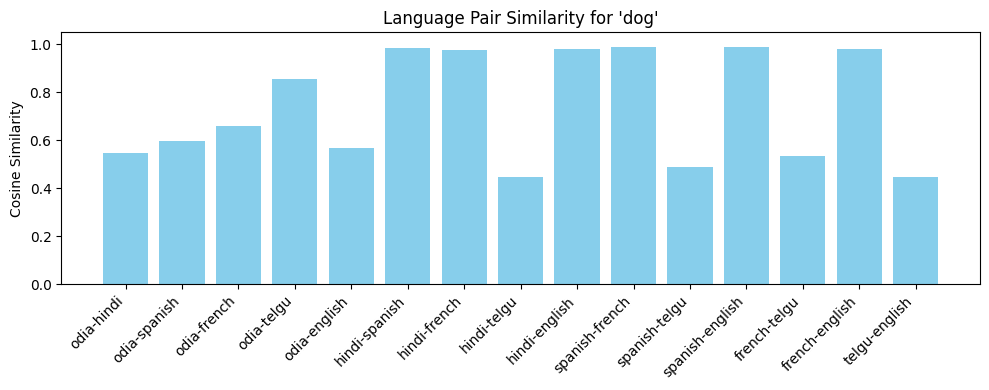

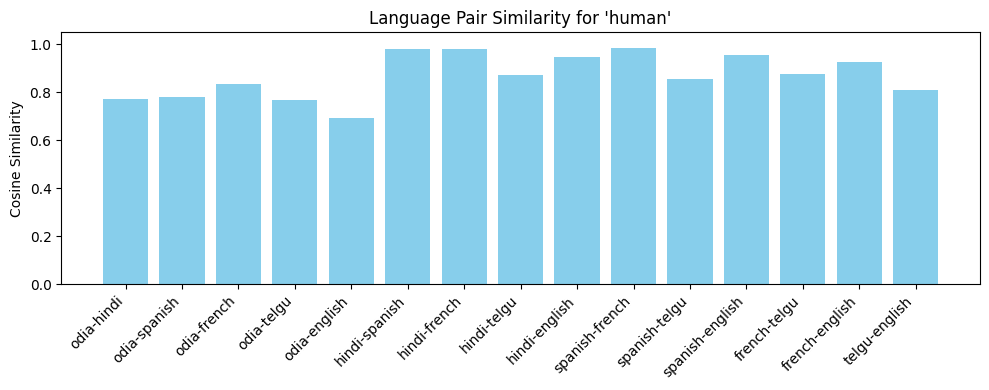

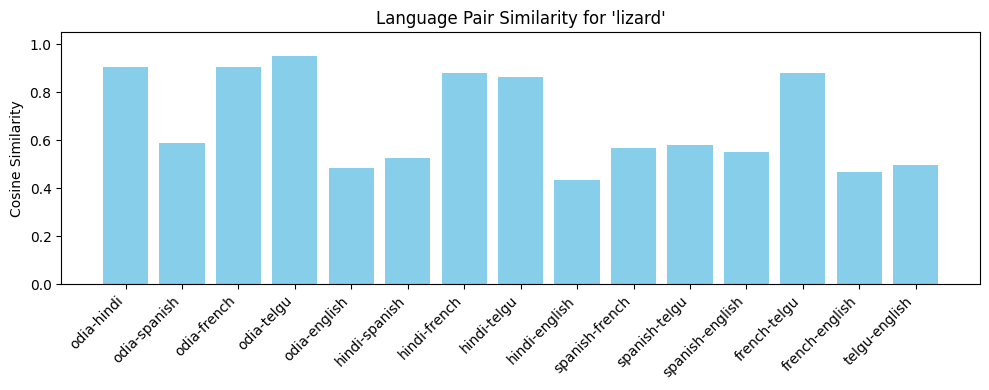

In [14]:
import matplotlib.pyplot as plt

for word, sim_dict in similarities.items():
    plt.figure(figsize=(10, 4))
    pairs = list(sim_dict.keys())
    scores = list(sim_dict.values())
    
    plt.bar(pairs, scores, color='skyblue')
    plt.xticks(rotation=45, ha='right')
    plt.title(f"Language Pair Similarity for '{word}'")
    plt.ylabel("Cosine Similarity")
    plt.ylim(0, 1.05)
    plt.tight_layout()
    plt.show()

In [15]:
def smooth(data, window_size=5):
    """Simple moving average smoothing."""
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')

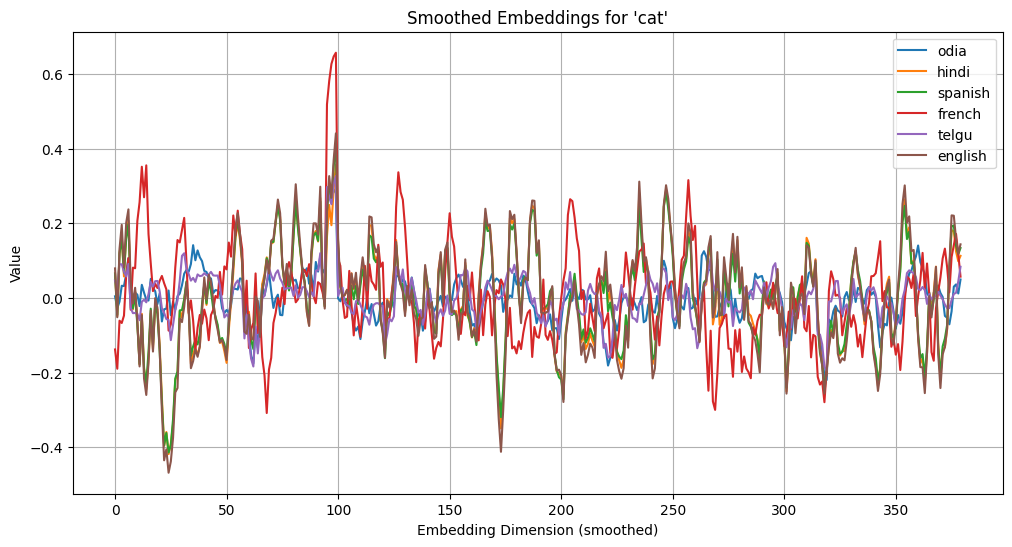

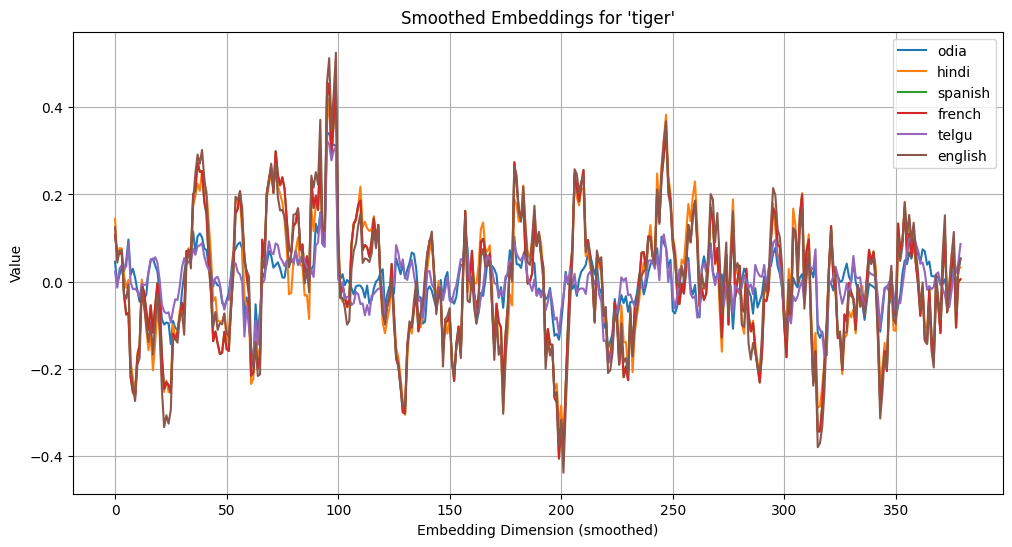

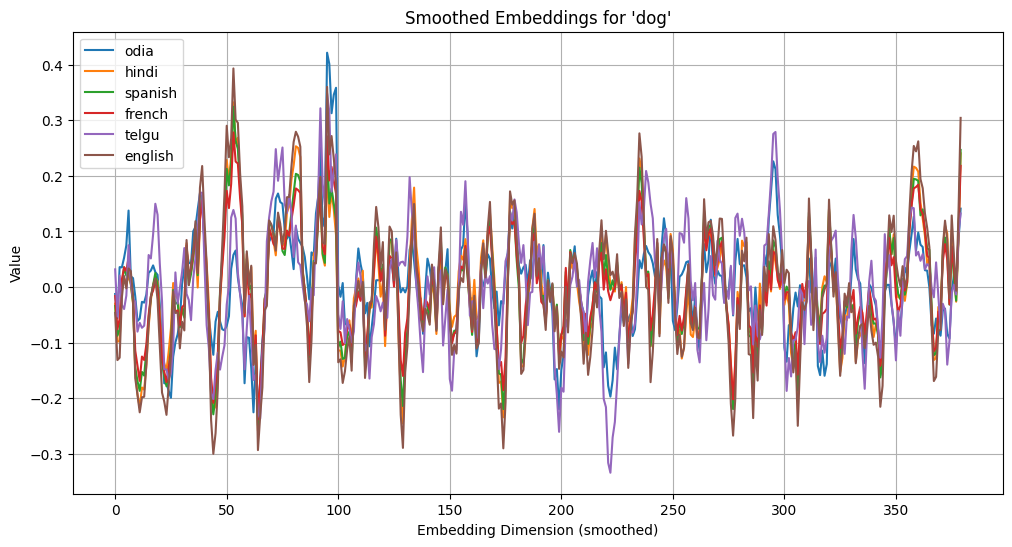

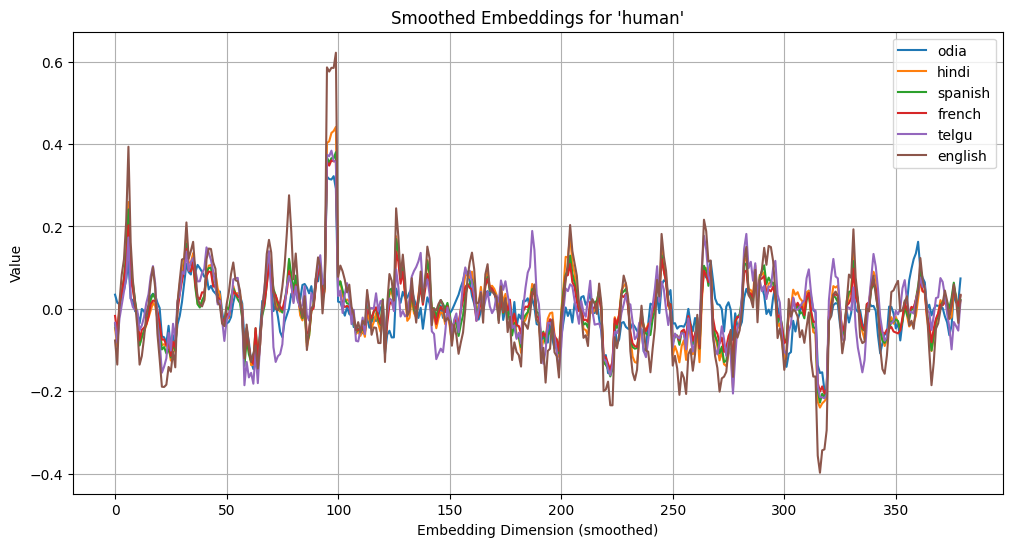

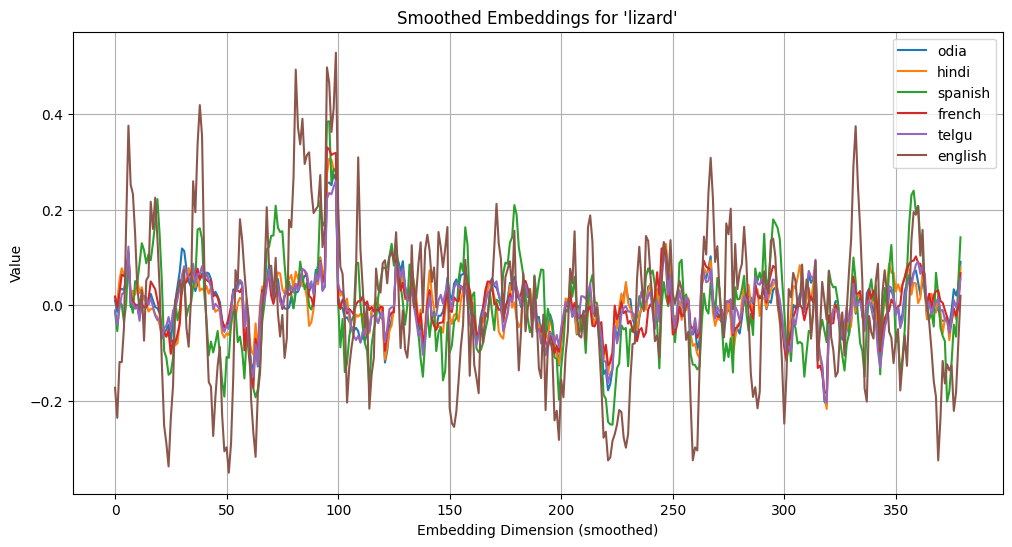

In [16]:
for word, lang_embeds in embeddings.items():
    plt.figure(figsize=(12, 6))
    for lang, emb in lang_embeds.items():
        emb_array = np.array(emb)
        smoothed = smooth(emb_array, window_size=5)
        plt.plot(smoothed, label=lang)
    
    plt.title(f"Smoothed Embeddings for '{word}'")
    plt.xlabel("Embedding Dimension (smoothed)")
    plt.ylabel("Value")
    plt.legend()
    plt.grid(True)
    plt.show()

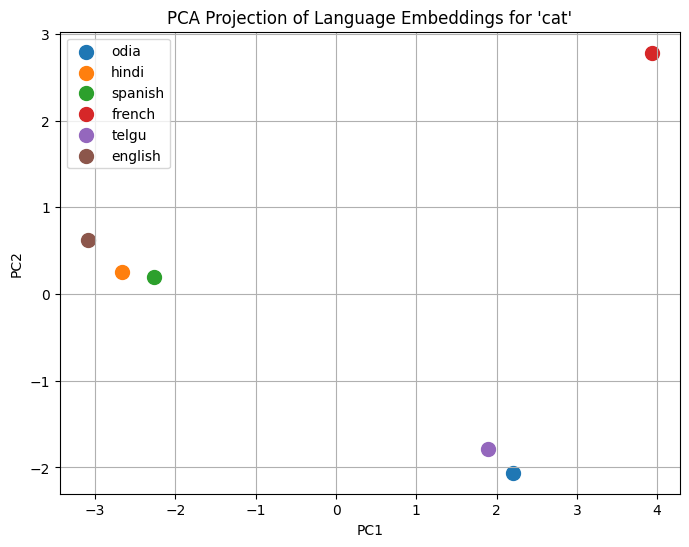

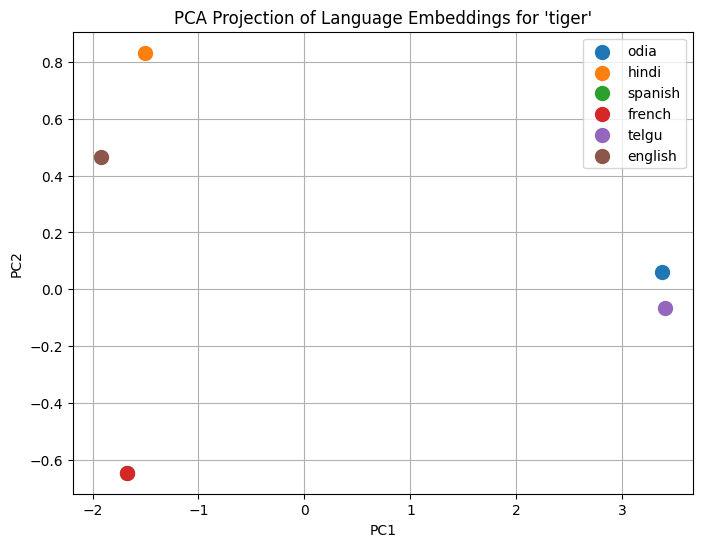

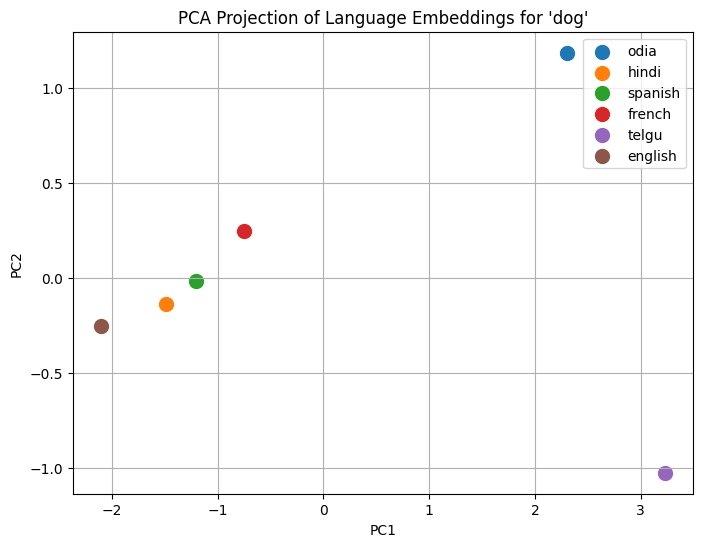

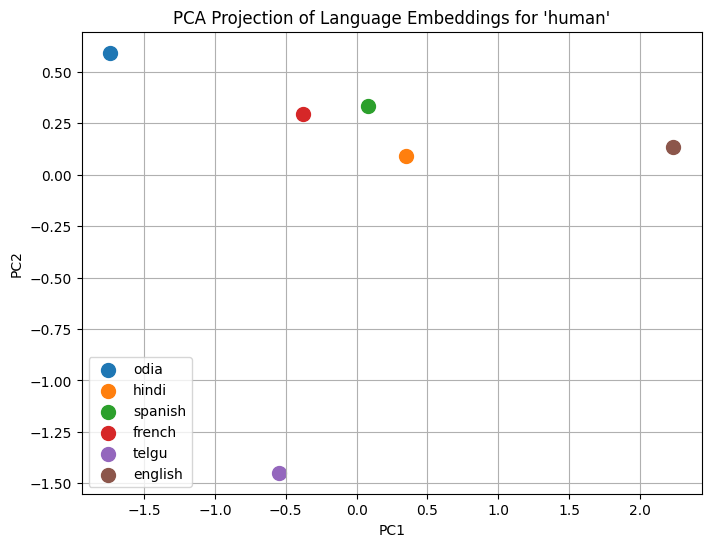

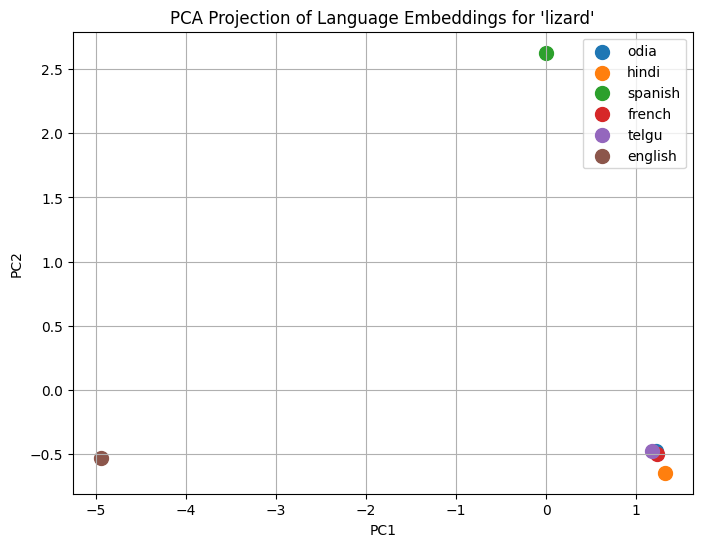

In [17]:
from sklearn.decomposition import PCA

for word, lang_embeds in embeddings.items():
    vectors = list(lang_embeds.values())
    labels = list(lang_embeds.keys())

    pca = PCA(n_components=2)
    reduced = pca.fit_transform(vectors)

    plt.figure(figsize=(8, 6))
    for i, label in enumerate(labels):
        plt.scatter(reduced[i, 0], reduced[i, 1], label=label, s=100)
    plt.title(f"PCA Projection of Language Embeddings for '{word}'")
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.legend()
    plt.grid(True)
    plt.show()

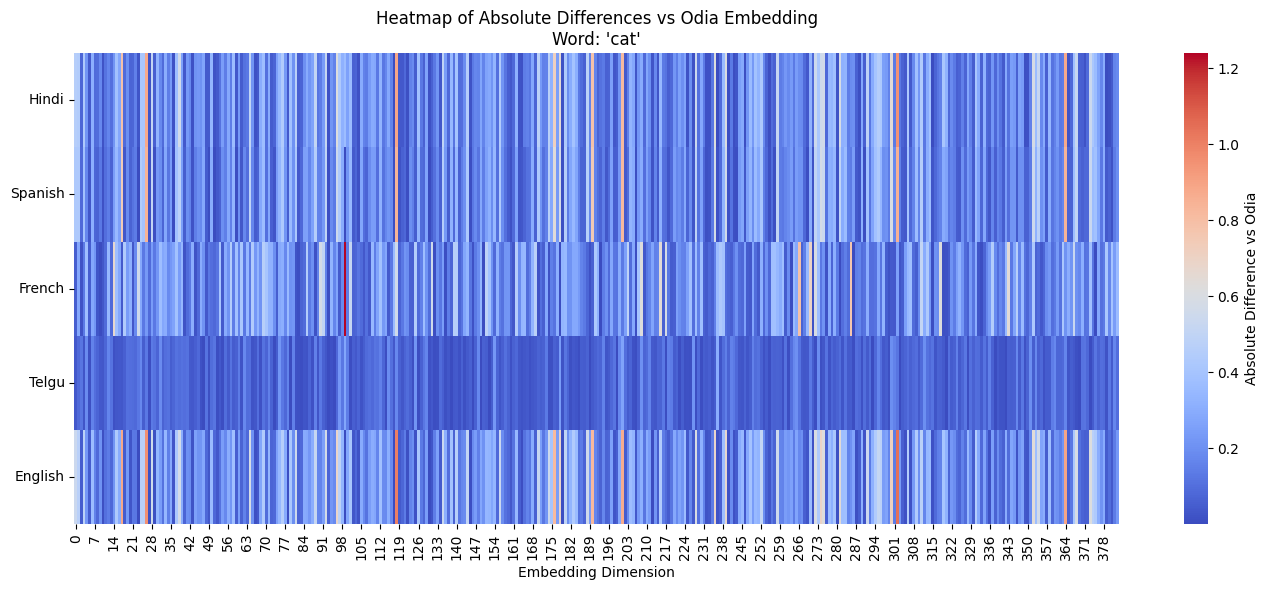

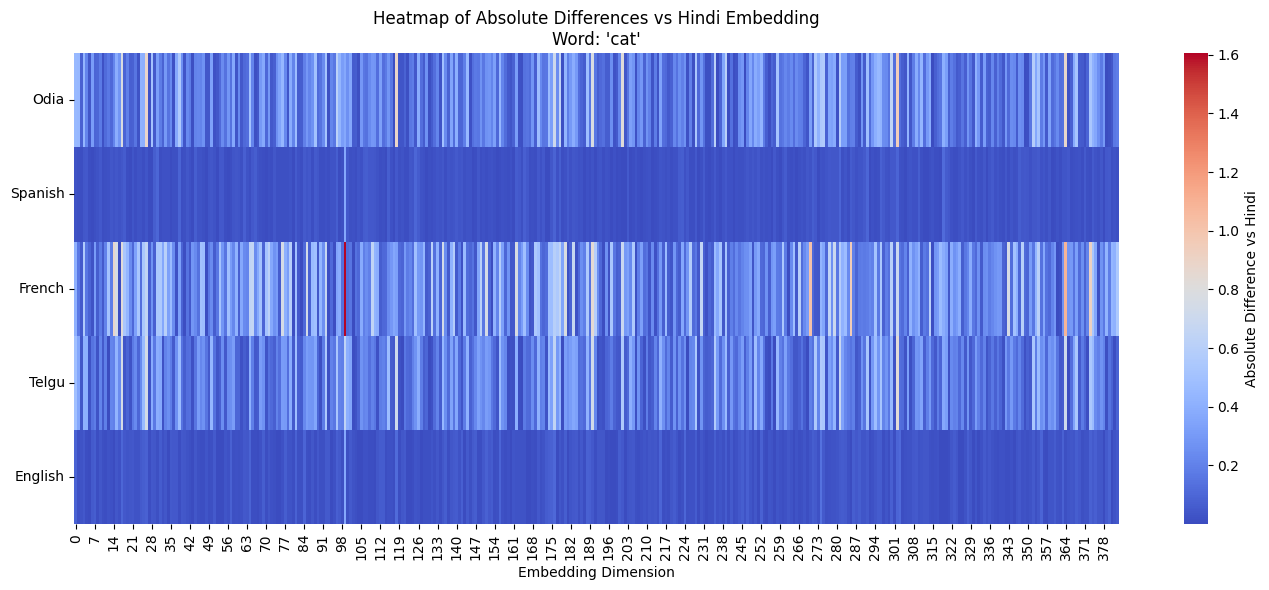

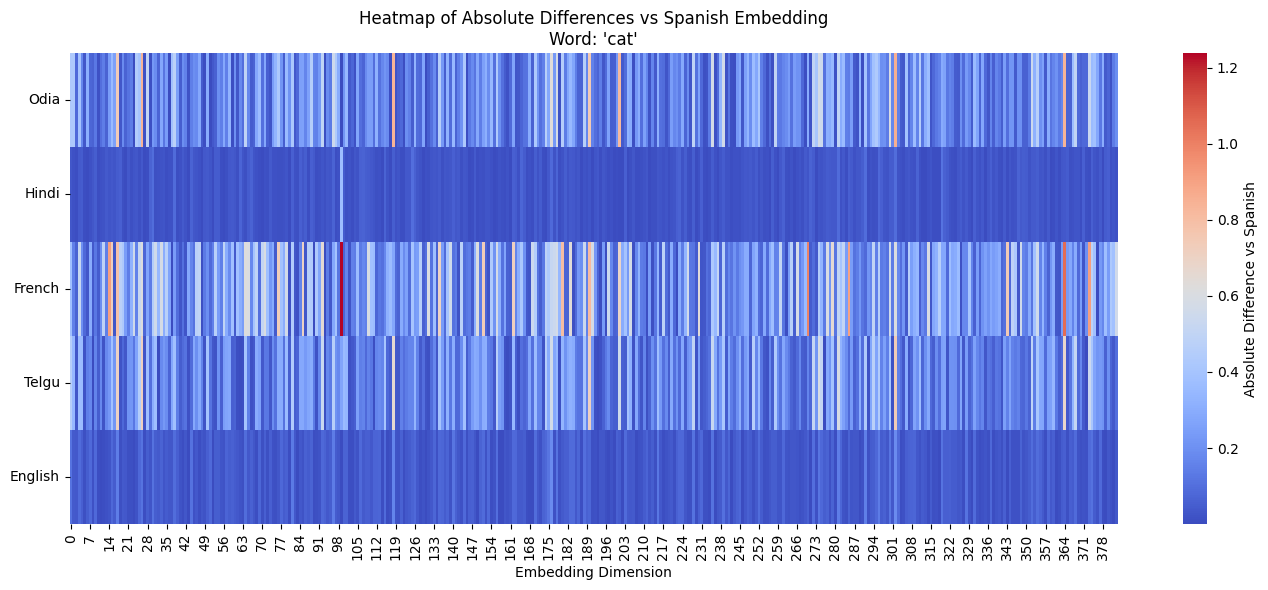

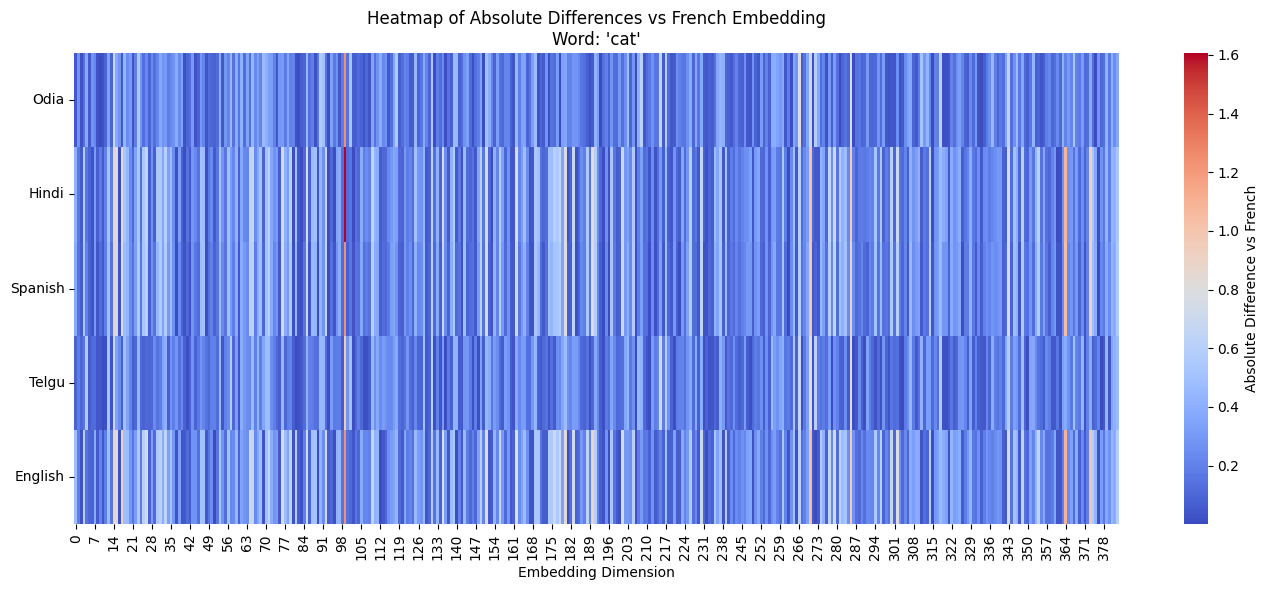

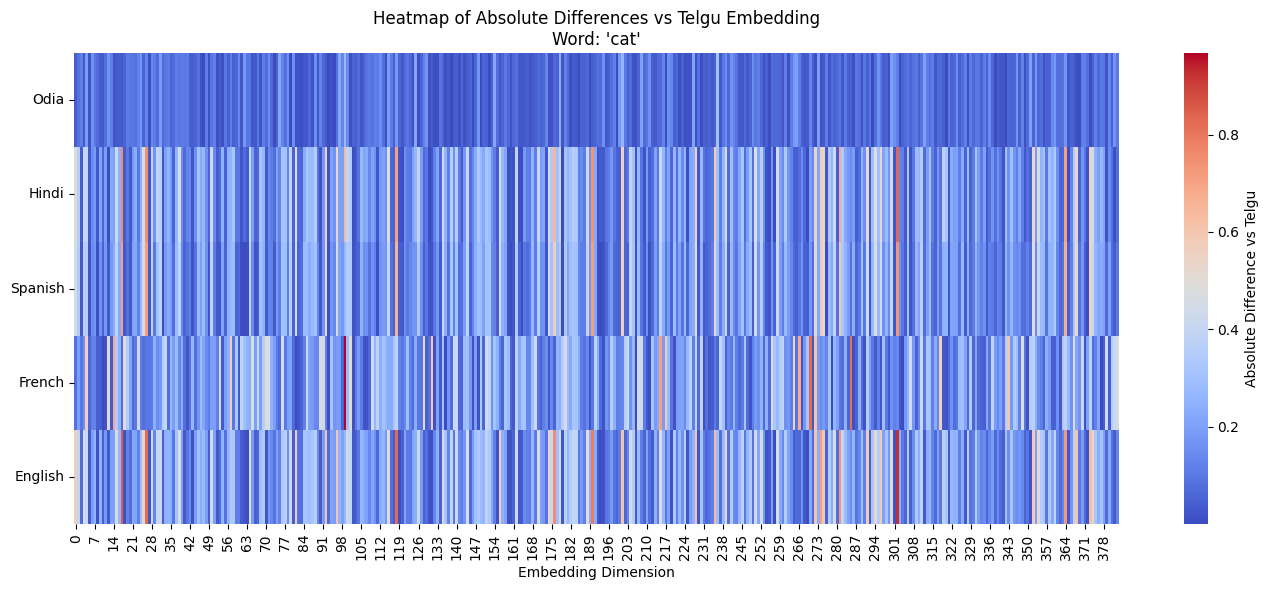

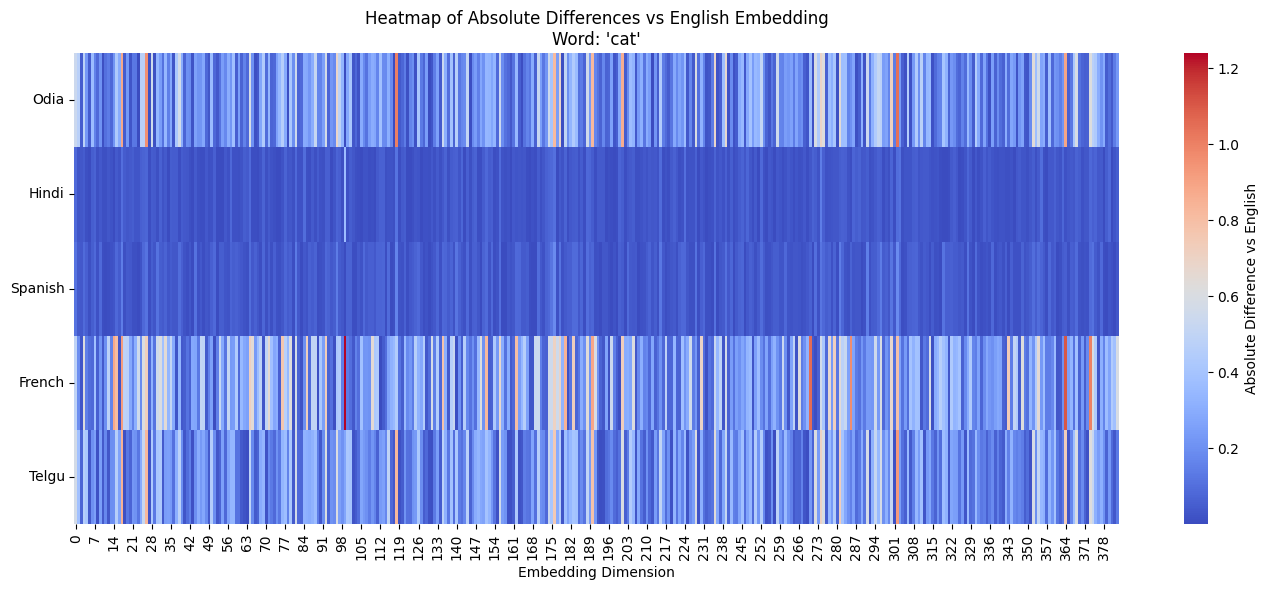

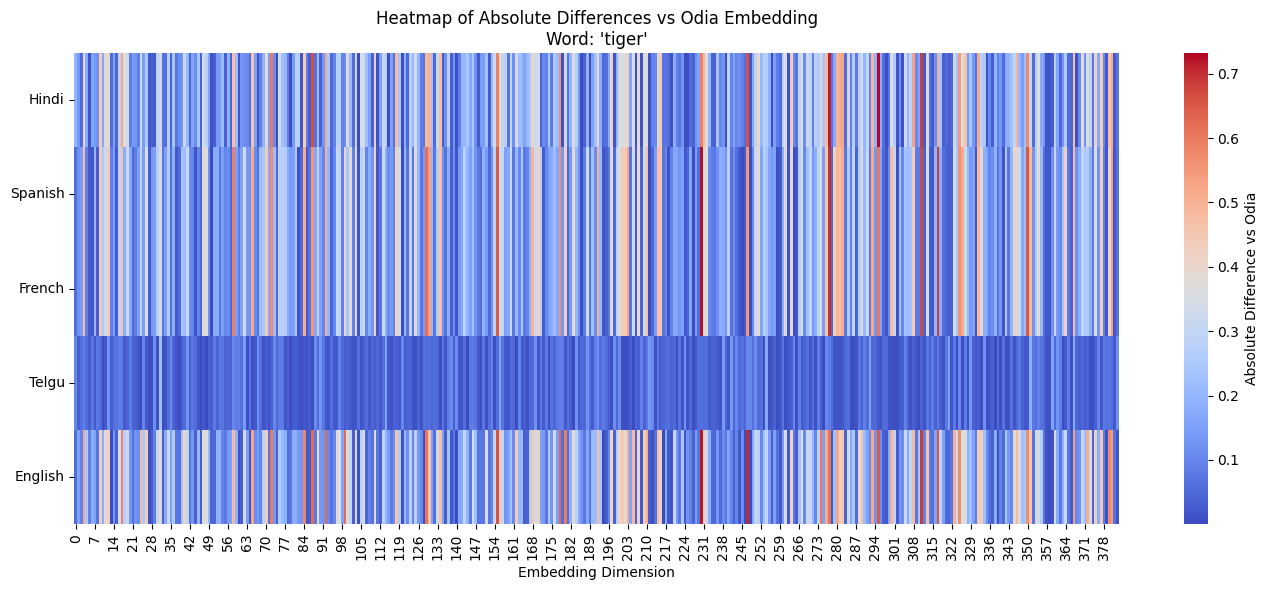

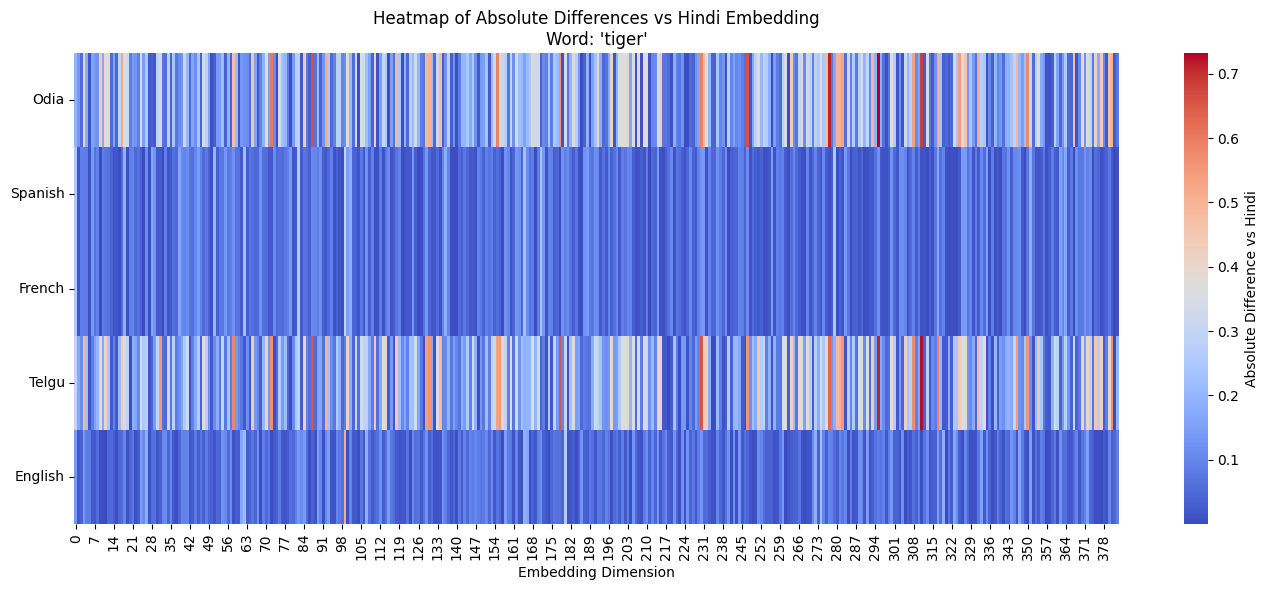

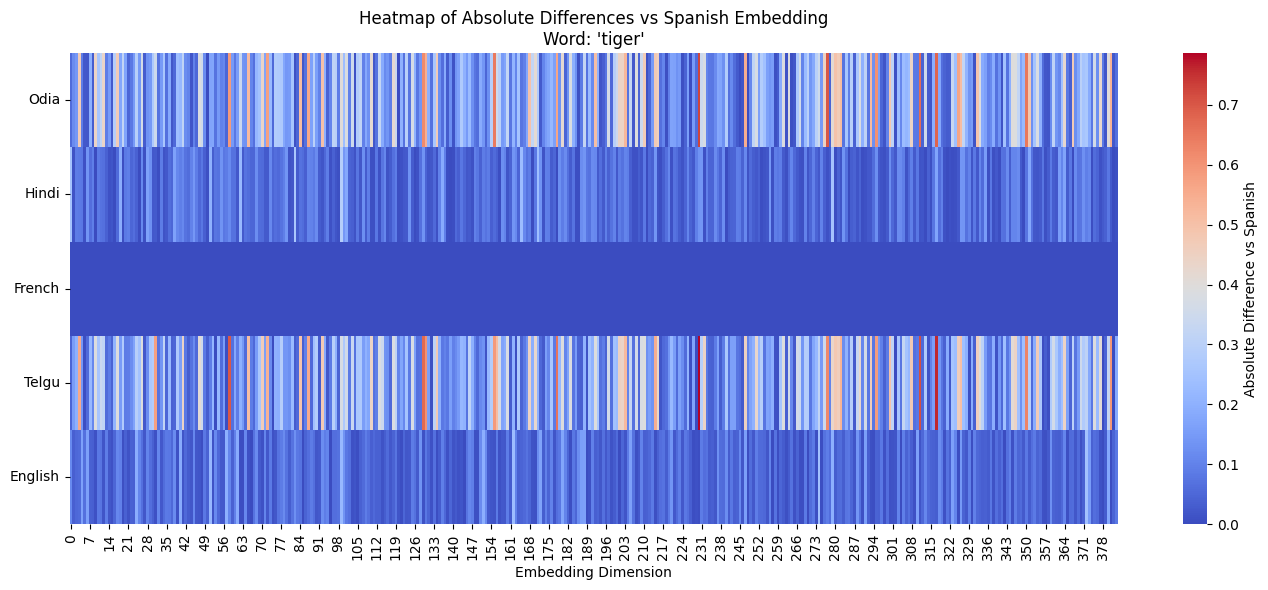

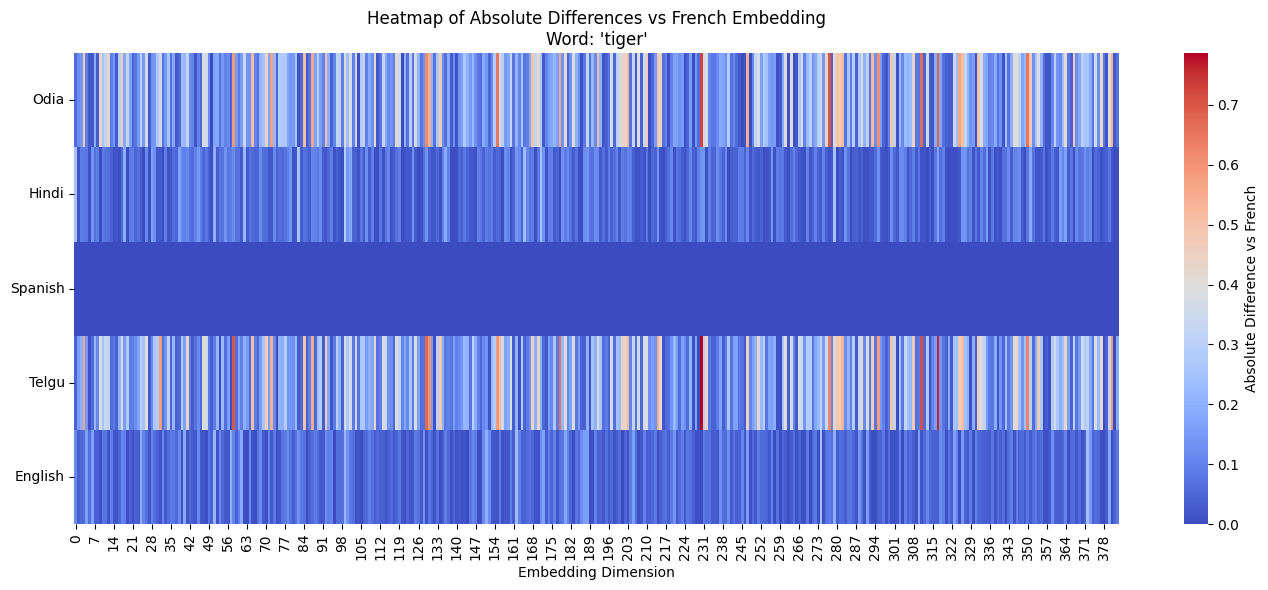

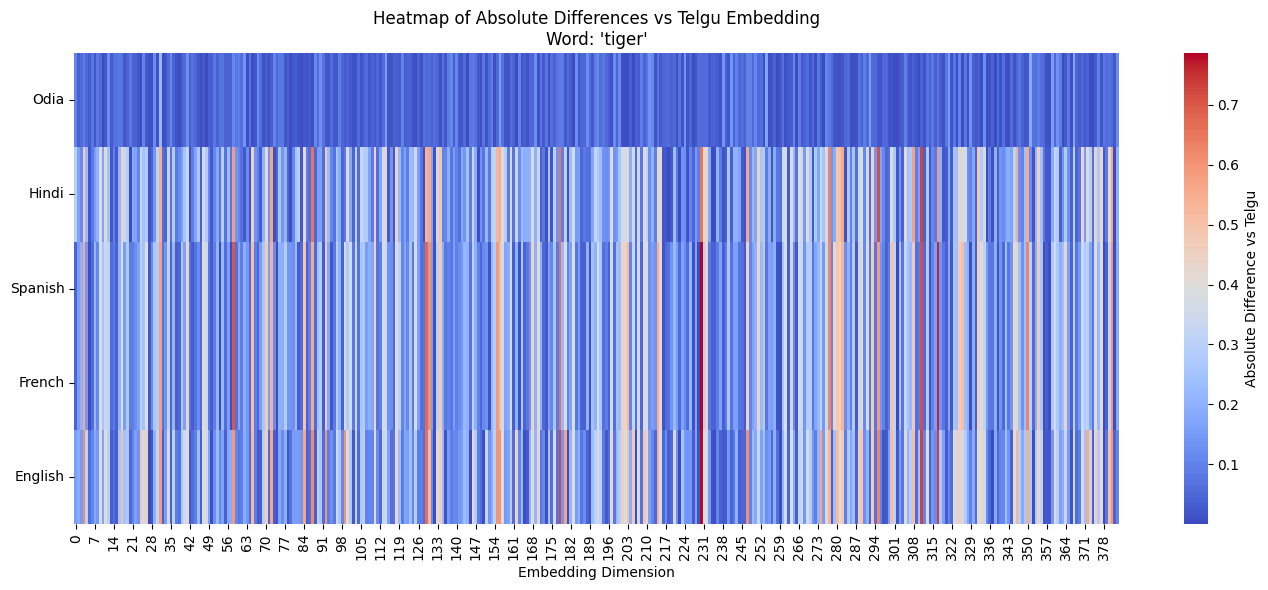

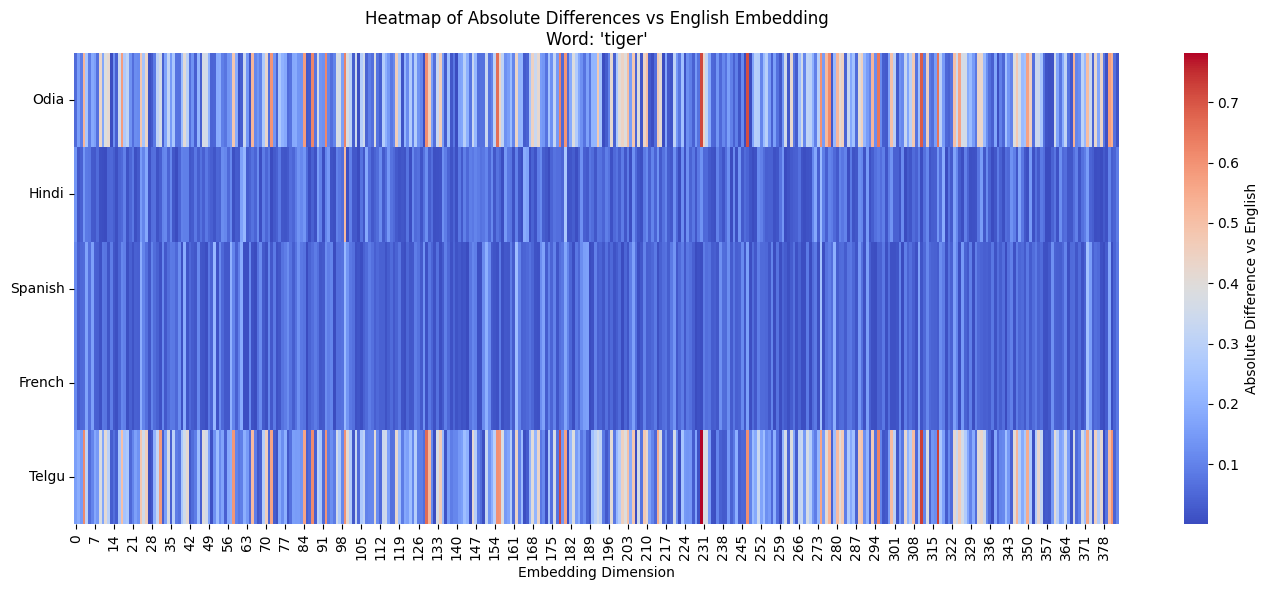

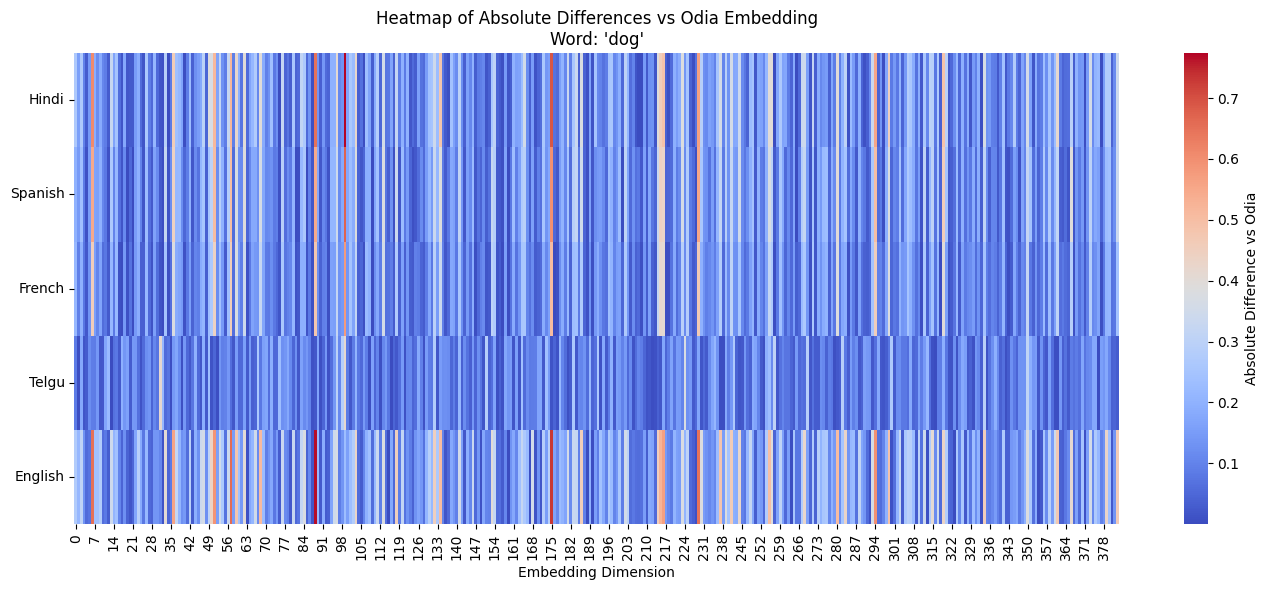

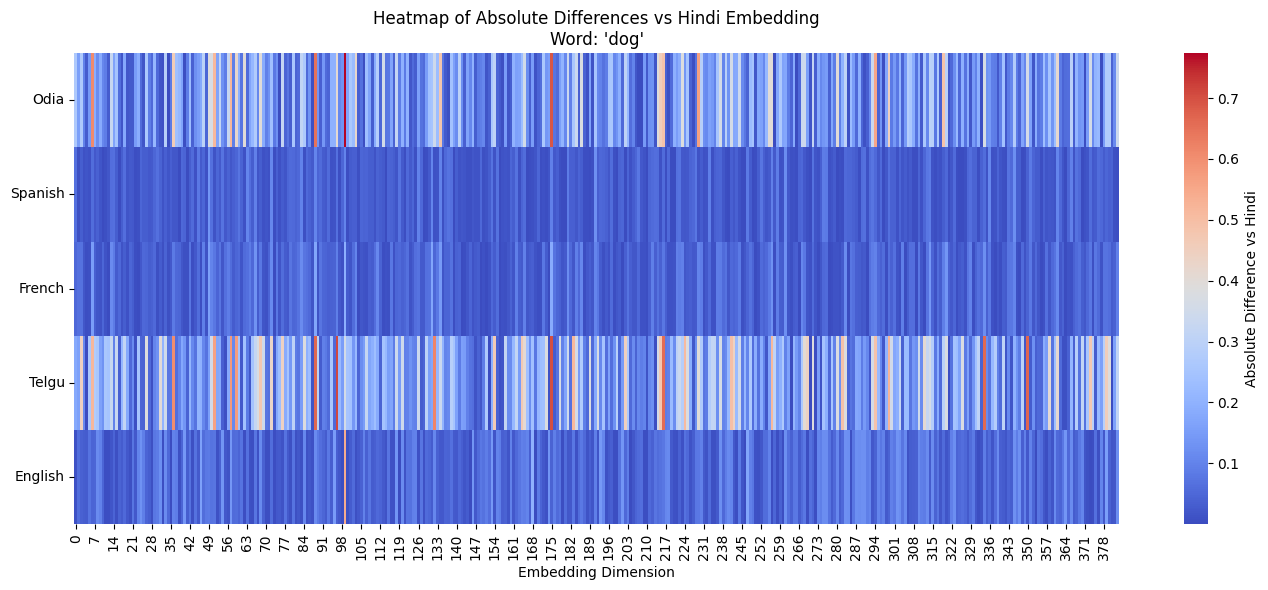

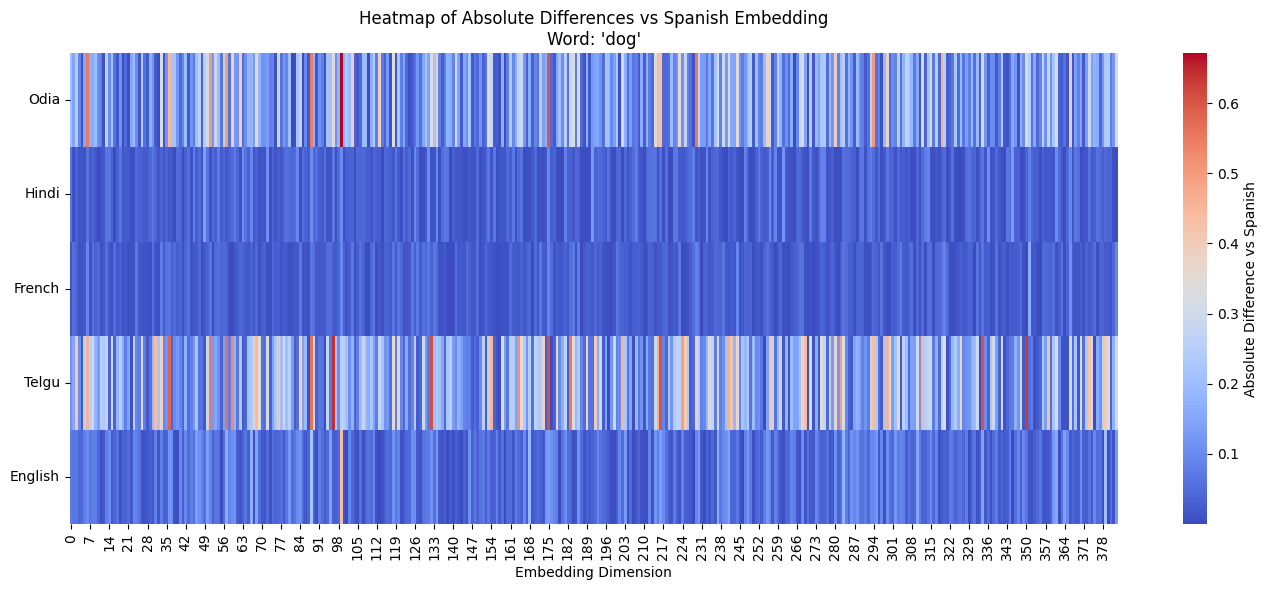

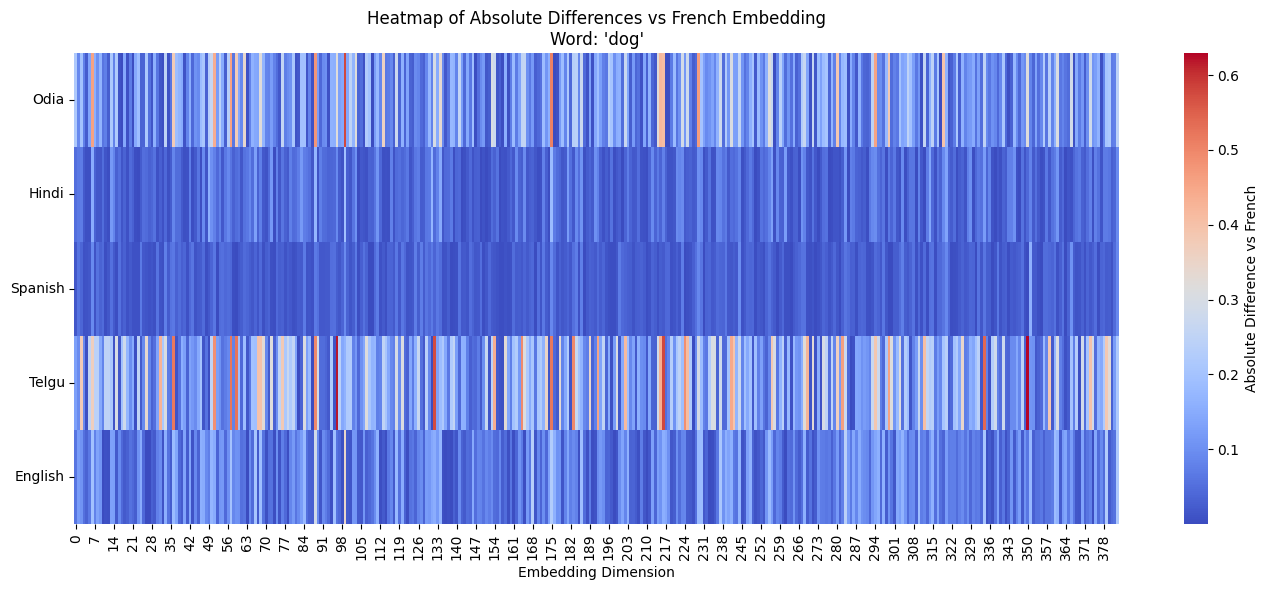

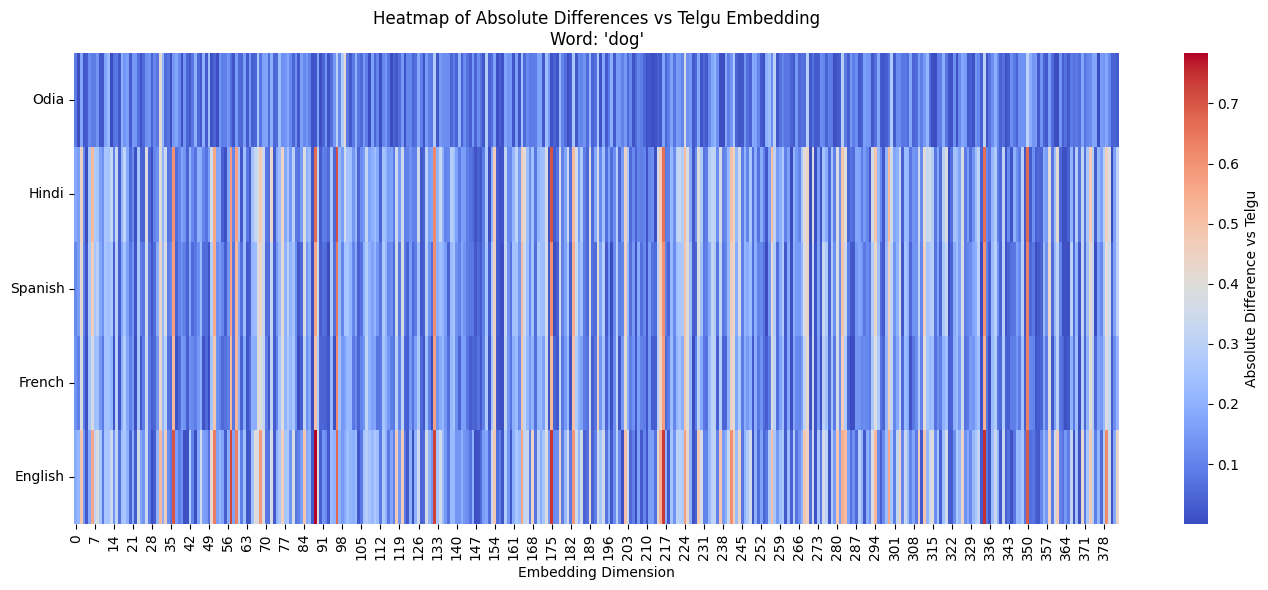

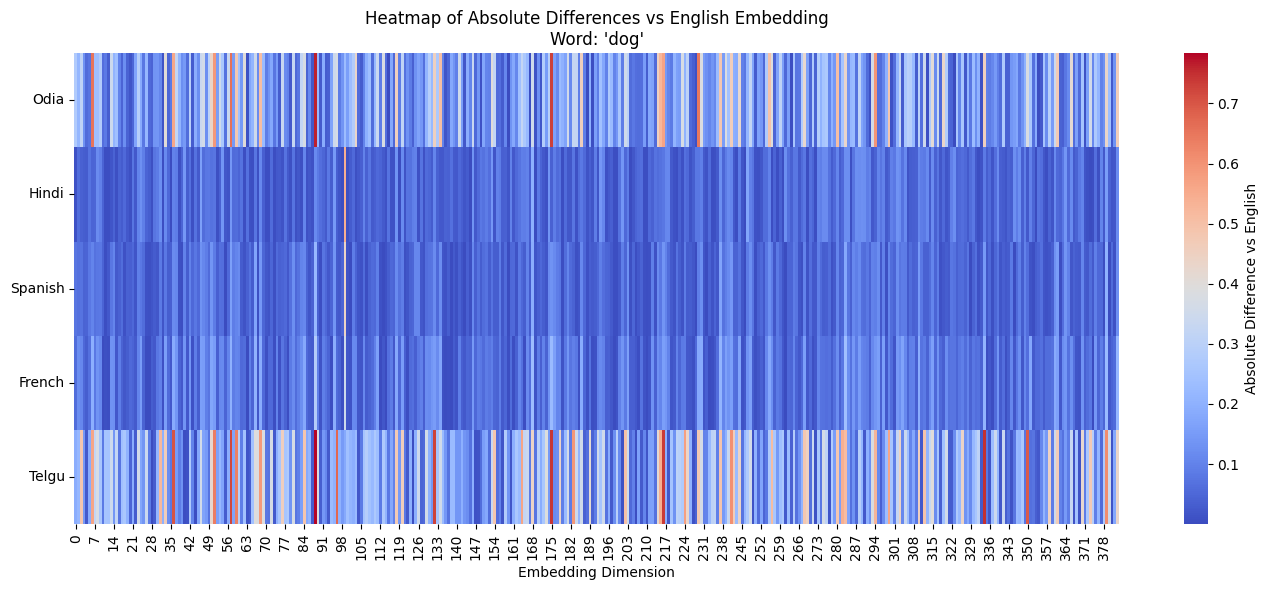

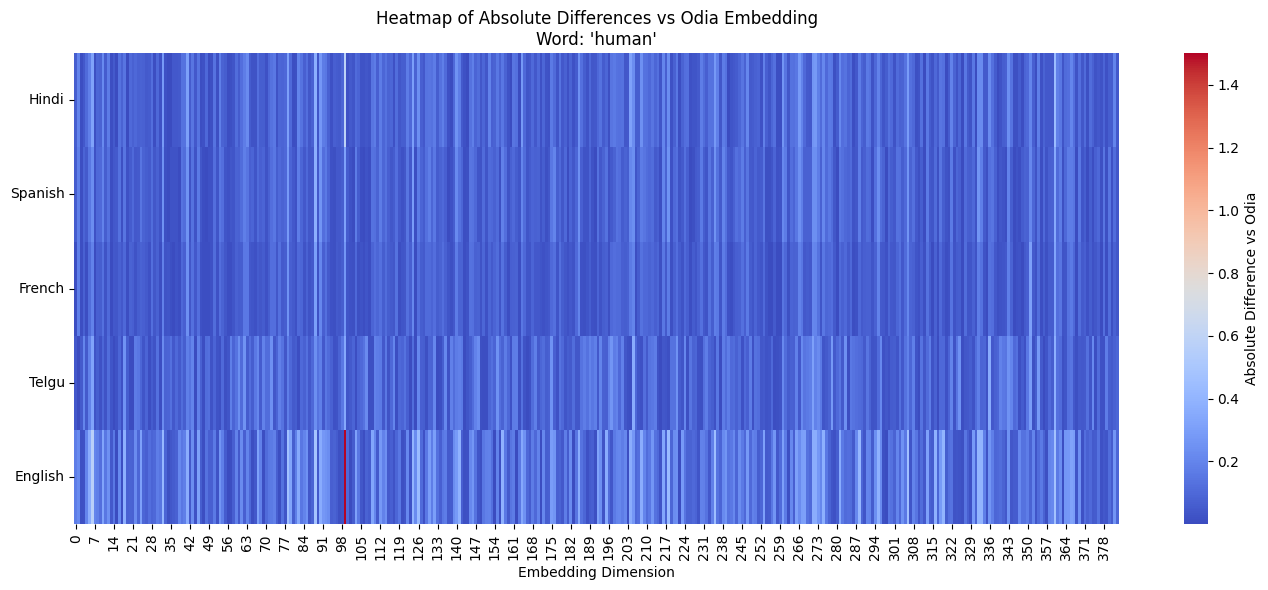

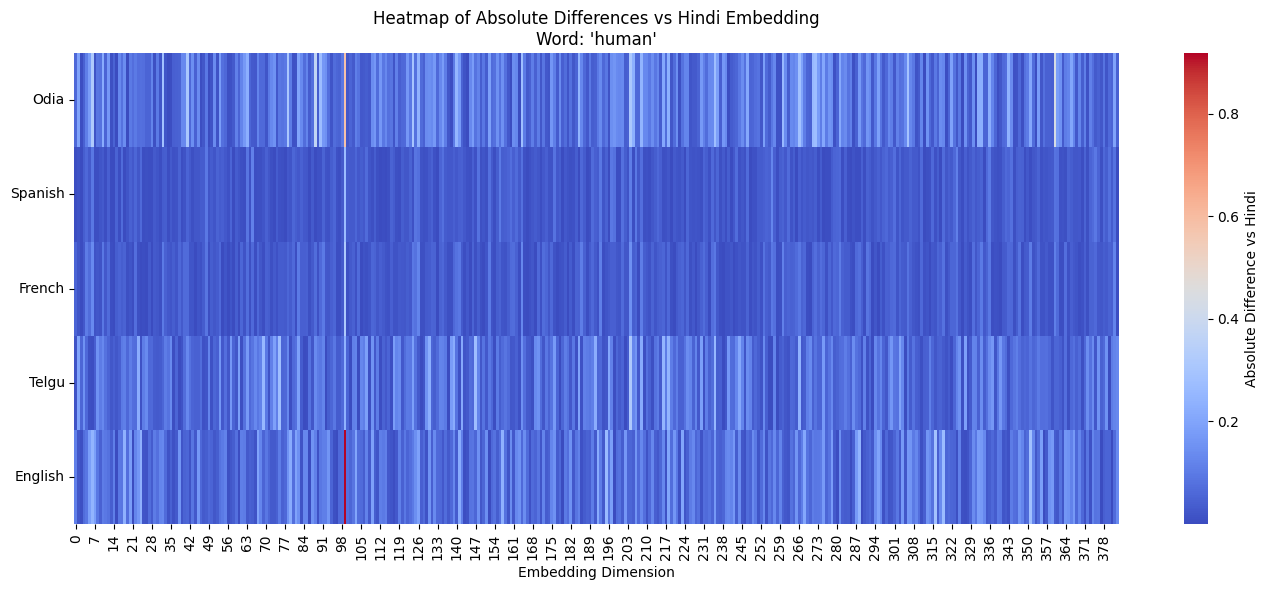

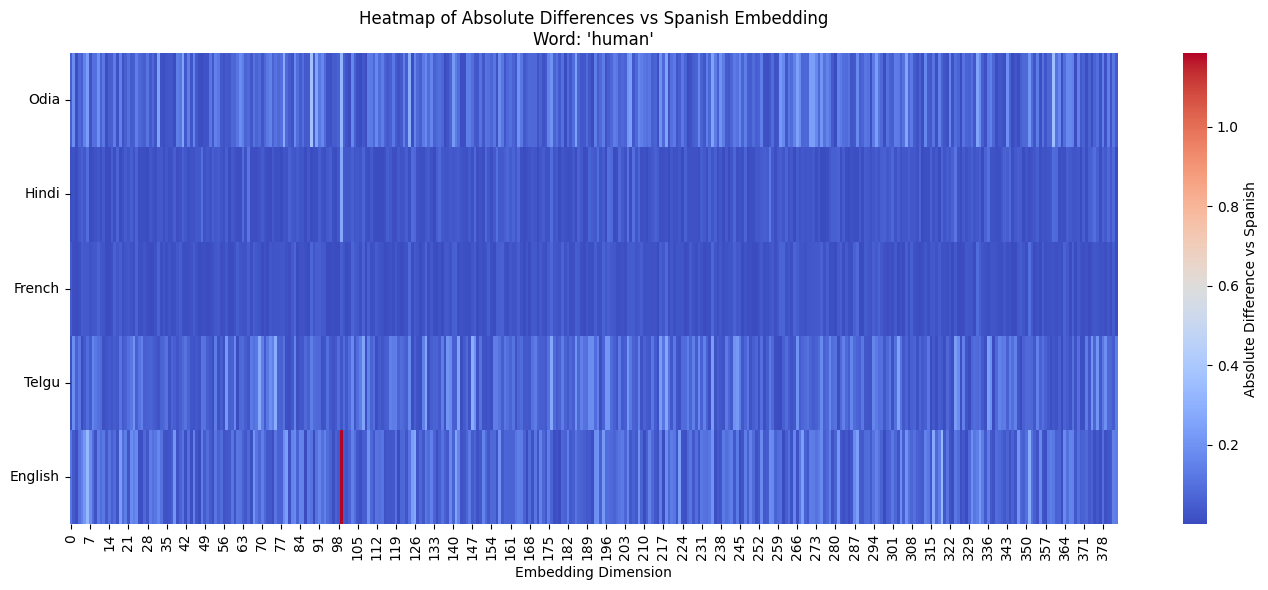

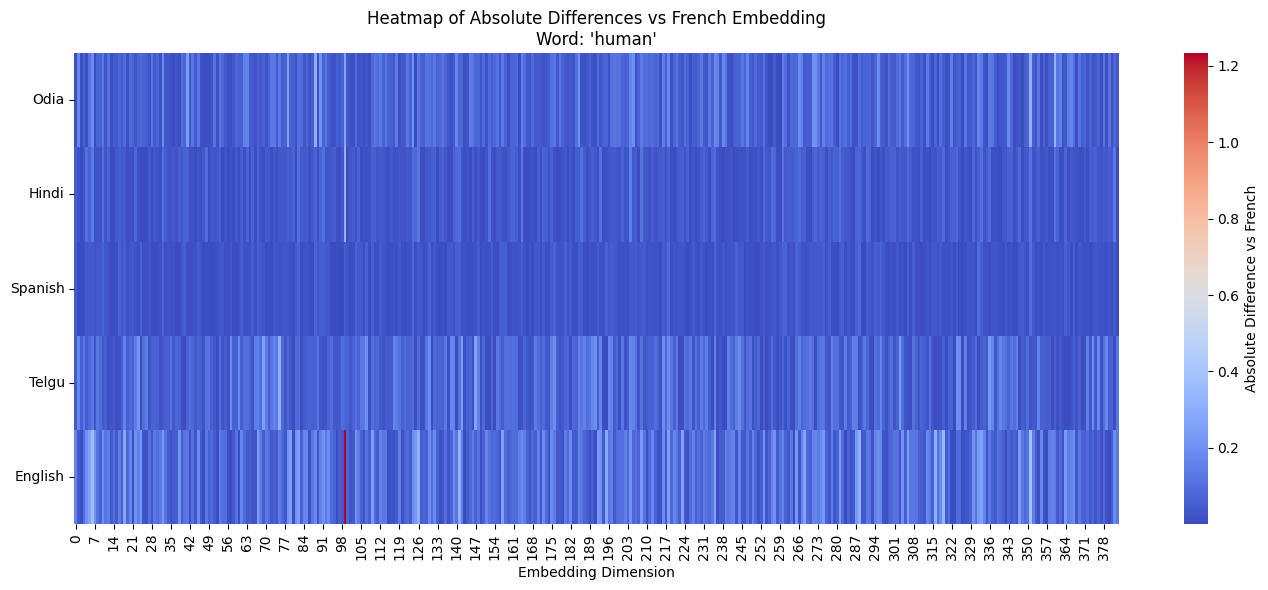

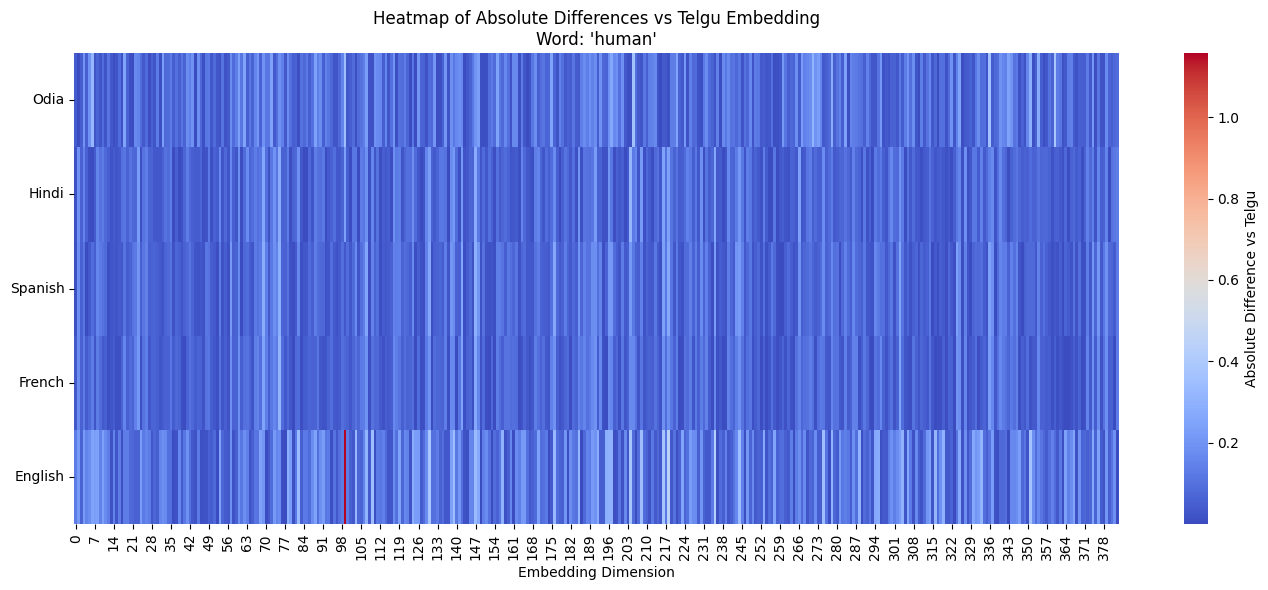

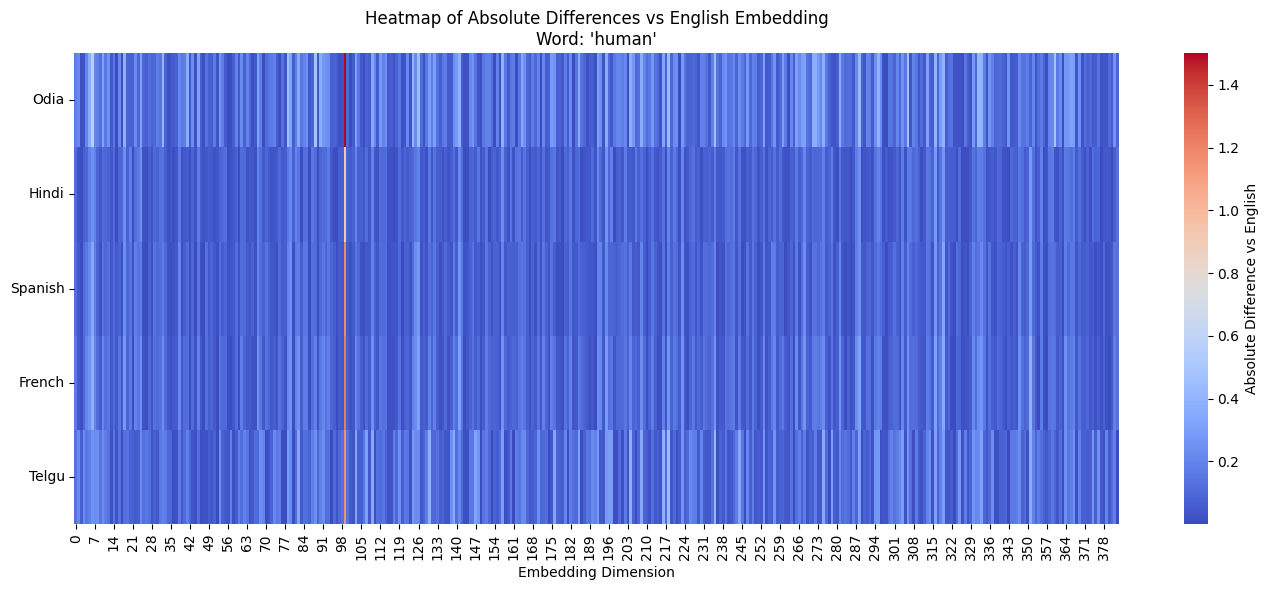

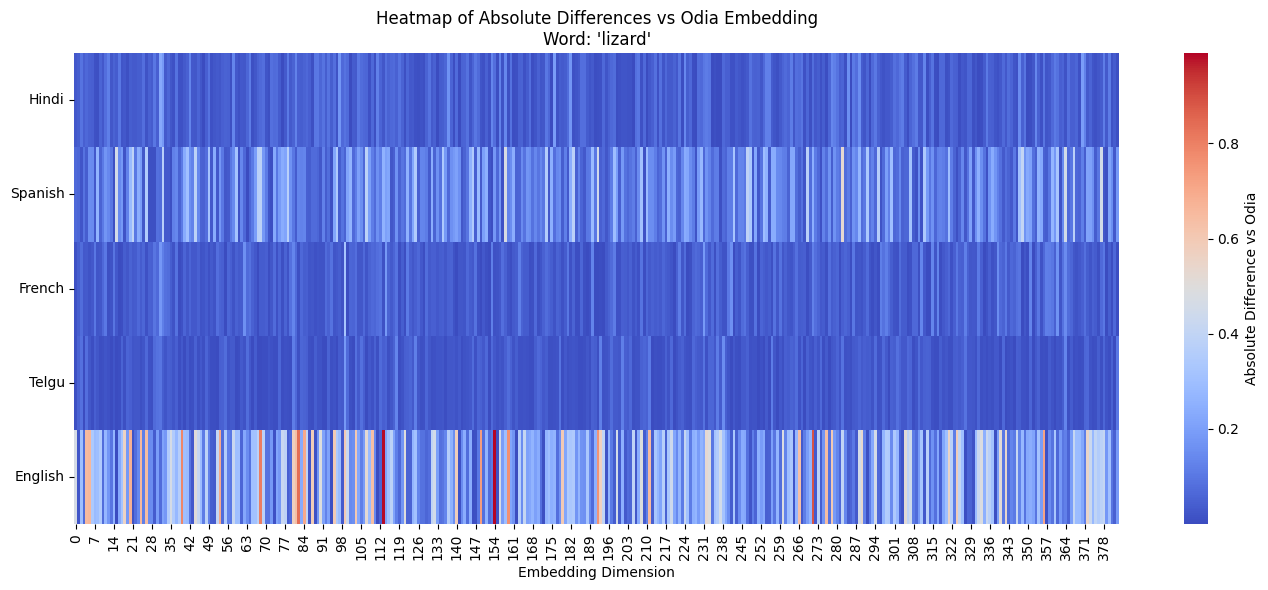

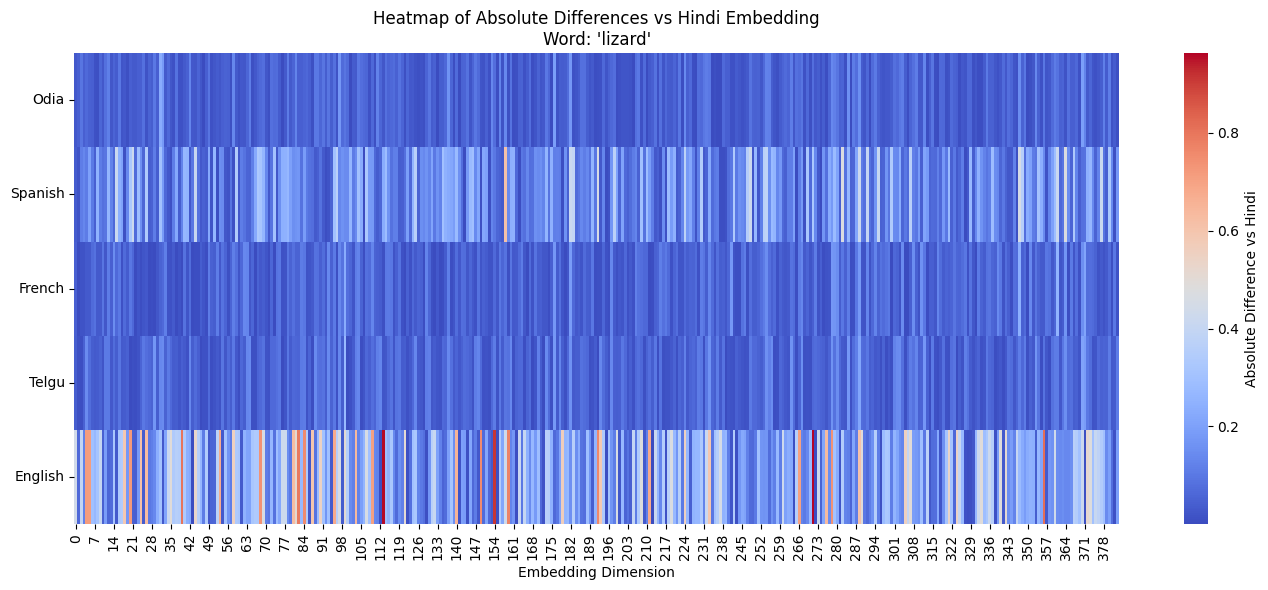

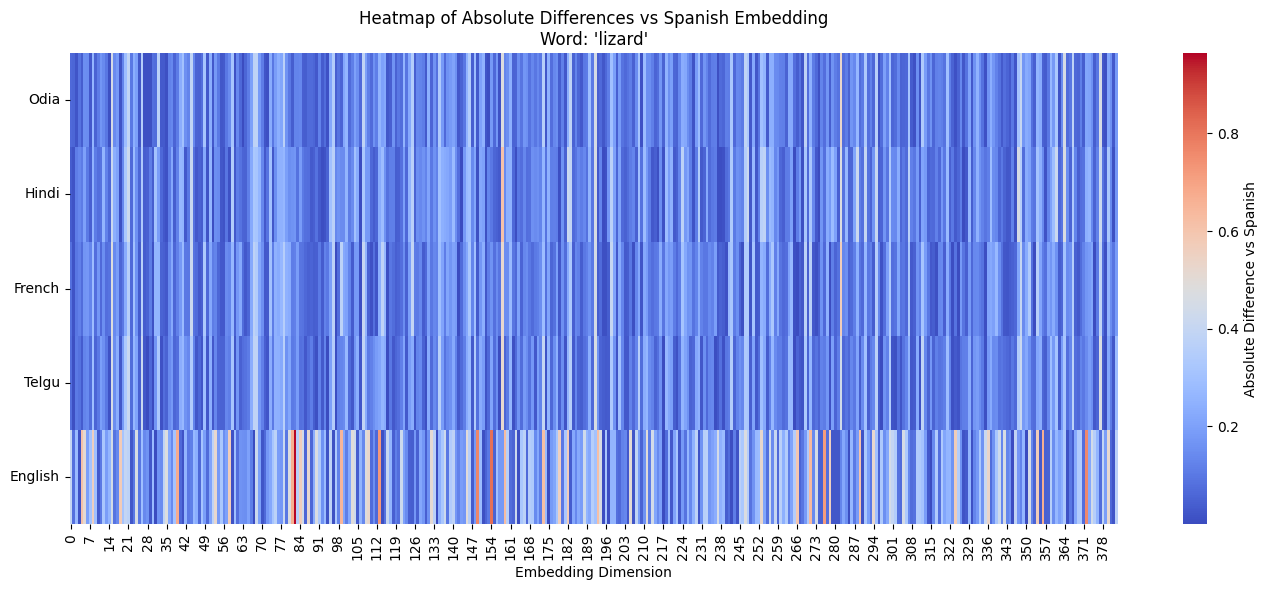

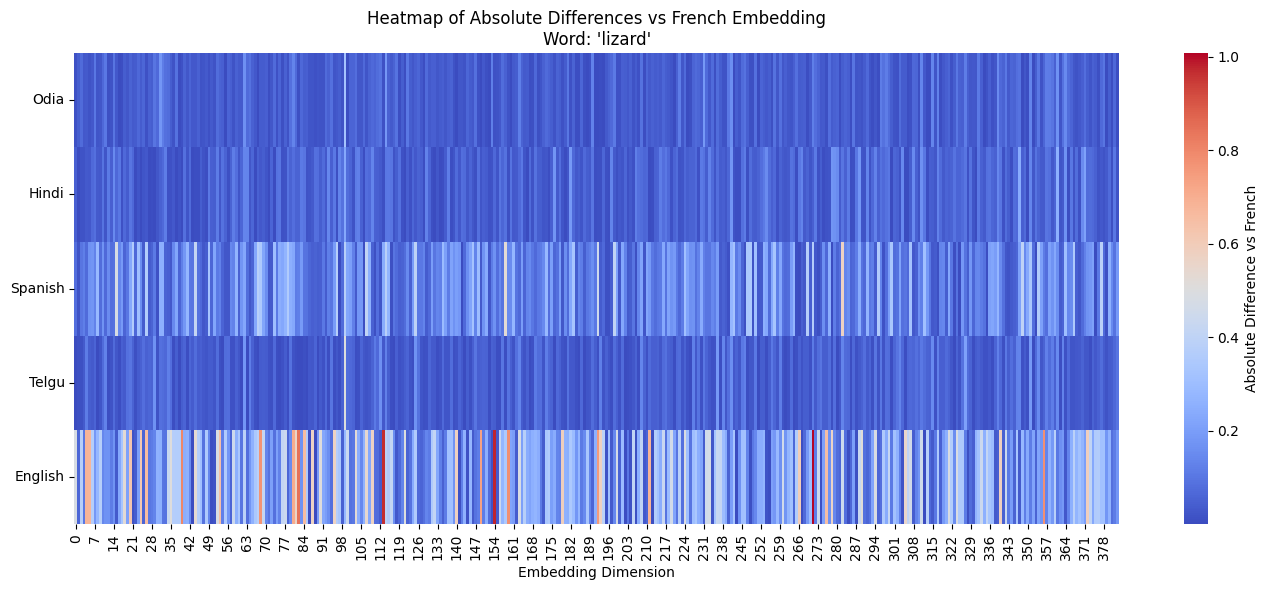

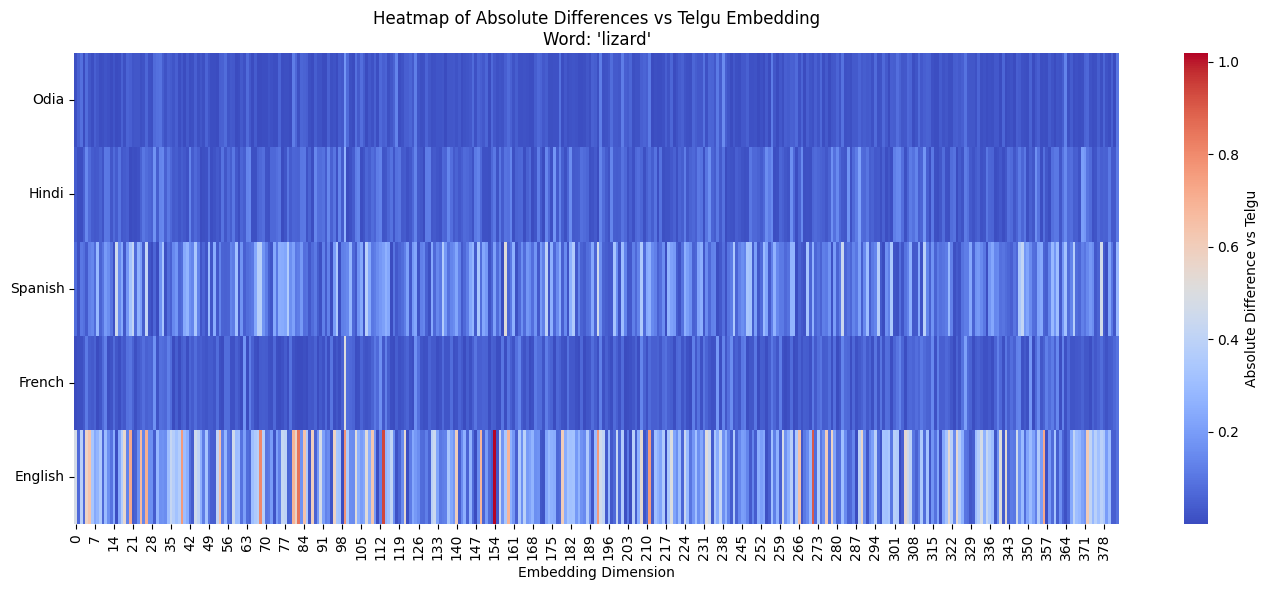

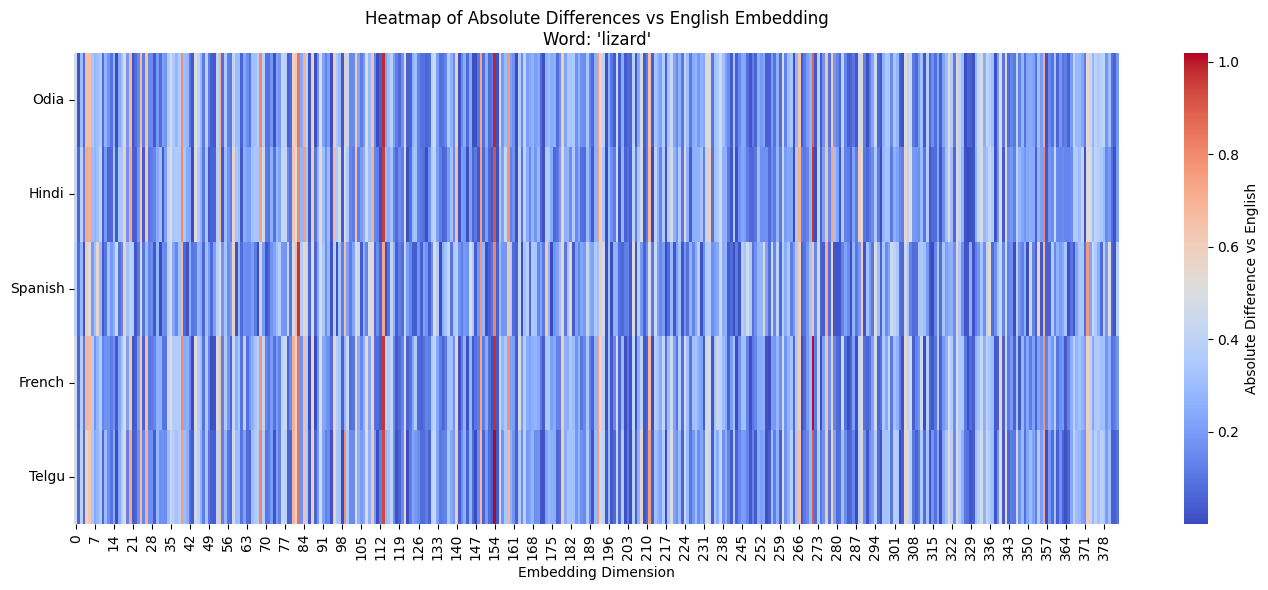

In [18]:
import seaborn as sns
for word, lang_embeds in embeddings.items():
    for base_lang, base_vec in lang_embeds.items():
        diff_dict = {}
        for lang, vec in lang_embeds.items():
            if lang != base_lang:
                diff_dict[lang.capitalize()] = np.abs(np.array(vec) - np.array(base_vec))
        
        if not diff_dict:
            continue  # Skip if only one language embedding
        
        diff_matrix = np.array(list(diff_dict.values()))
        
        plt.figure(figsize=(14, 6))
        sns.heatmap(diff_matrix, cmap="coolwarm",
                    cbar_kws={'label': f'Absolute Difference vs {base_lang.capitalize()}'})
        plt.yticks(np.arange(len(diff_dict)) + 0.5, list(diff_dict.keys()), rotation=0)
        plt.xlabel("Embedding Dimension")
        plt.title(f"Heatmap of Absolute Differences vs {base_lang.capitalize()} Embedding\nWord: '{word}'")
        plt.tight_layout()
        plt.show()